<a href="https://colab.research.google.com/github/moronjie/BlogAPI/blob/main/projectWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/drive/MyDrive/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: Augmented Images/Augmented Images/Monkeypox_augmented/M40_01_06.jpg  
  inflating: Augmented Images/Augmented Images/Monkeypox_augmented/M40_01_07.jpg  
  inflating: Augmented Images/Augmented Images/Monkeypox_augmented/M40_01_08.jpg  
  inflating: Augmented Images/Augmented Images/Monkeypox_augmented/M40_01_09.jpg  
  inflating: Augmented Images/Augmented Images/Monkeypox_augmented/M40_01_10.jpg  
  inflating: Augmented Images/Augmented Images/Monkeypox_augmented/M40_01_11.jpg  
  inflating: Augmented Images/Augmented Images/Monkeypox_augmented/M40_01_12.jpg  
  inflating: Augmented Images/Augmented Images/Monkeypox_augmented/M40_01_13.jpg  
  inflating: Augmented Images/Augmented Images/Monkeypox_augmented/M40_02_00.jpg  
  inflating: Augmented Images/Augmented Images/Monkeypox_augmented/M40_02_01.jpg  
  inflating: Augmented Images/Augmented Images/Monkeypox_augmented/M40_02_02.jpg  
  inflating: Augmented Images/Augmen

In [ ]:
import os
import random
import shutil

In [ ]:
''' 
# Set the path to your dataset folder
data_dir = "/content/drive/MyDrive/monkeyPox/Augmented Images/Augmented Images"

# Create directories to store the classified data
train_dir = os.path.join(data_dir, 'train')
os.makedirs(train_dir, exist_ok=True)
train_monkeypox_dir = os.path.join(train_dir, 'monkeypox')
os.makedirs(train_monkeypox_dir, exist_ok=True)
train_nonmonkeypox_dir = os.path.join(train_dir, 'non-monkeypox')
os.makedirs(train_nonmonkeypox_dir, exist_ok=True)

test_dir = os.path.join(data_dir, 'test')
os.makedirs(test_dir, exist_ok=True)
test_monkeypox_dir = os.path.join(test_dir, 'monkeypox')
os.makedirs(test_monkeypox_dir, exist_ok=True)
test_nonmonkeypox_dir = os.path.join(test_dir, 'non-monkeypox')
os.makedirs(test_nonmonkeypox_dir, exist_ok=True)

val_dir = os.path.join(data_dir, 'val')
os.makedirs(val_dir, exist_ok=True)
val_monkeypox_dir = os.path.join(val_dir, 'monkeypox')
os.makedirs(val_monkeypox_dir, exist_ok=True)
val_nonmonkeypox_dir = os.path.join(val_dir, 'non-monkeypox')
os.makedirs(val_nonmonkeypox_dir, exist_ok=True) '''

In [ ]:
''' # Define the ratio of train, test, and validation data
train_ratio = 0.6
test_ratio = 0.2
val_ratio = 0.2

# Loop through all files in the dataset folder
for filename in os.listdir(data_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        if 'monkeypox' in filename:
            # Copy monkeypox images to train, test, or validation directory
            if random.random() < train_ratio:
                shutil.copy(os.path.join(data_dir, filename), os.path.join(train_monkeypox_dir, filename))
            elif random.random() < (train_ratio + test_ratio):
                shutil.copy(os.path.join(data_dir, filename), os.path.join(test_monkeypox_dir, filename))
            else:
                shutil.copy(os.path.join(data_dir, filename), os.path.join(val_monkeypox_dir, filename))
        else:
            # Copy non-monkeypox images to train, test, or validation directory
            if random.random() < train_ratio:
                shutil.copy(os.path.join(data_dir, filename), os.path.join(train_nonmonkeypox_dir, filename))
            elif random.random() < (train_ratio + test_ratio):
                shutil.copy(os.path.join(data_dir, filename), os.path.join(test_nonmonkeypox_dir, filename))
            else:
                shutil.copy(os.path.join(data_dir, filename), os.path.join(val_nonmonkeypox_dir, filename)) '''

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:
# Define the image dimensions and other hyperparameters
img_width = 224
img_height = 224
batch_size = 32
epochs = 500

# Define the train, test, and validation directories
train_dir = '/content/Fold1/Fold1/Fold1/Train'
test_dir = '/content/Fold1/Fold1/Fold1/Test'
val_dir = '/content/Fold1/Fold1/Fold1/Val'

In [ ]:
# Create ImageDataGenerator objects to augment the training data and rescale the validation and test data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators for the training, validation, and test data
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(img_width, img_height),
                                                batch_size=batch_size,
                                                class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  class_mode='binary')


Found 2142 images belonging to 2 classes.
Found 420 images belonging to 2 classes.
Found 45 images belonging to 2 classes.


In [ ]:
# Define the CNN model
#add a regularizer
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(510, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

In [ ]:
# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
# Train the model and save the history
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=epochs,
                    validation_data=val_generator,
                    validation_steps=val_generator.samples // batch_size)

Epoch 1/10
66/66 [==============================] - 332s 5s/step - loss: 0.8394 - accuracy: 0.5559 - val_loss: 0.6392 - val_accuracy: 0.6947
Epoch 2/10
66/66 [==============================] - 323s 5s/step - loss: 0.6689 - accuracy: 0.5872 - val_loss: 0.5917 - val_accuracy: 0.7043
Epoch 3/10
66/66 [==============================] - 329s 5s/step - loss: 0.6544 - accuracy: 0.6118 - val_loss: 0.6042 - val_accuracy: 0.6923
Epoch 4/10
66/66 [==============================] - 326s 5s/step - loss: 0.6495 - accuracy: 0.6379 - val_loss: 0.6048 - val_accuracy: 0.7308
Epoch 5/10
66/66 [==============================] - 312s 5s/step - loss: 0.6450 - accuracy: 0.6265 - val_loss: 0.6111 - val_accuracy: 0.6995
Epoch 6/10
66/66 [==============================] - 323s 5s/step - loss: 0.6461 - accuracy: 0.6289 - val_loss: 0.5843 - val_accuracy: 0.7380
Epoch 7/10
66/66 [==============================] - 311s 5s/step - loss: 0.6340 - accuracy: 0.6441 - val_loss: 0.5950 - val_accuracy: 0.6779
Epoch 8/10
66

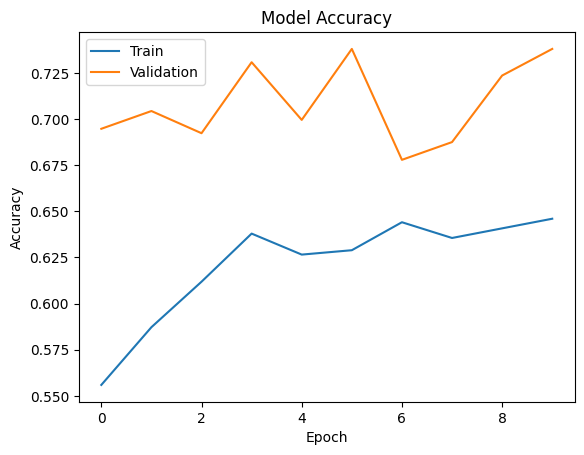

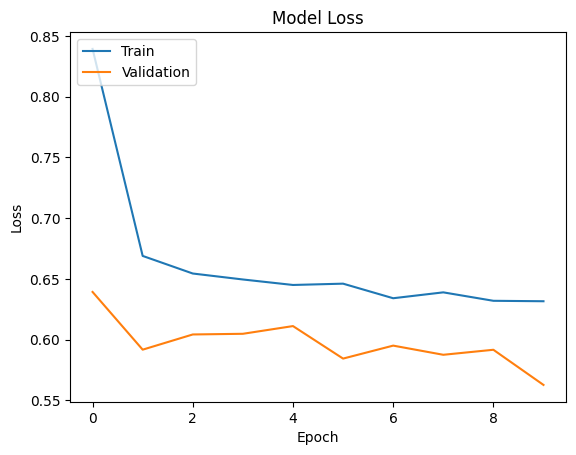

In [ ]:
# Plot the training and validation accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model on the test data and print the accuracy and loss
score = model.evaluate(test_generator)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

2/2 [==============================] - 1s 402ms/step - loss: 0.6124 - accuracy: 0.6222
Test Loss: 0.6124116778373718
Test Accuracy: 0.6222222447395325
